<a href="https://colab.research.google.com/github/ben8169/Study/blob/main/AI/Pytorch_Deeplearning_Project/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# !pip  install torchviz

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchviz import make_dot

plt.rc('font', family='NanumBarunGothic')

In [3]:
#for mac
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

>#### 3.5

In [4]:
sampleData1 = np.array([
    [166, 58.7],
    [176, 75.7],
    [171, 62.1],
    [173, 70.4],
    [169, 60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [5]:
x = sampleData1[:,0]
y = sampleData1[:,1]
x, y

(array([166., 176., 171., 173., 169.]), array([58.7, 75.7, 62.1, 70.4, 60.1]))

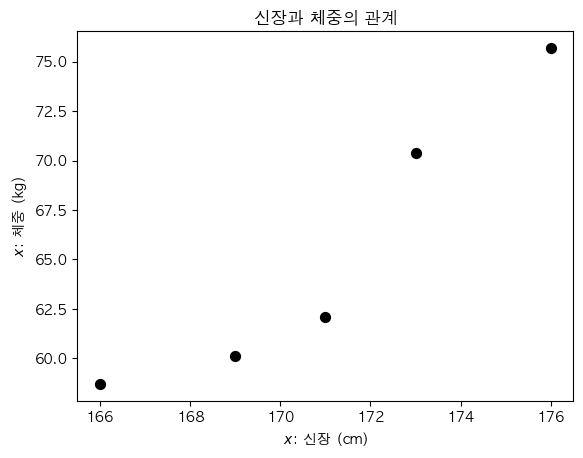

In [6]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 신장 (cm)')
plt.ylabel('$x$: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

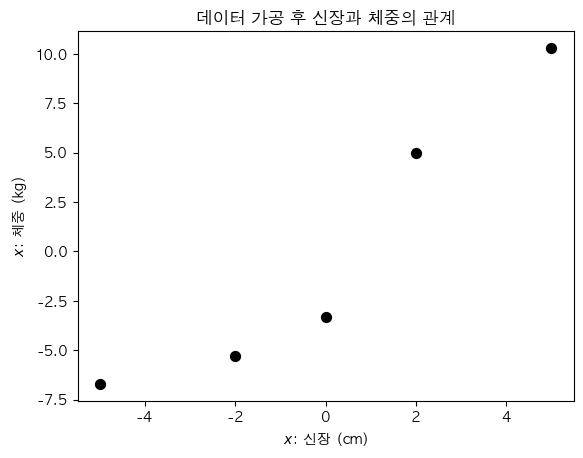

In [7]:
X = x-x.mean()
Y = y-y.mean()

plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$x$: 신장 (cm)')
plt.ylabel('$x$: 체중 (kg)')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

>#### 3.6 예측 계산

In [8]:
#텐서 변수로 변환
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [9]:
#파라미터 정의
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

W, B, W.grad, B.grad

(tensor(1., requires_grad=True), tensor(1., requires_grad=True), None, None)

In [10]:
def pred(X):
  return W*X +B

Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


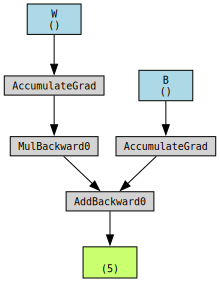

In [11]:
params = {'W':W, 'B':B}
g = make_dot(Yp, params=params)
display(g)

>#### 3.7 손실 계산

In [12]:
def MSE(Yp, Y):
  return ((Yp-Y)**2).mean()

loss = MSE(Yp, Y)
loss

tensor(13.3520, grad_fn=<MeanBackward0>)

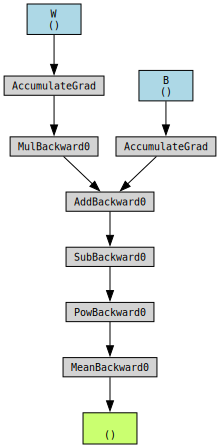

In [13]:
params = {'W':W, 'B':B}
g = make_dot(loss, params=params)
display(g)

>#### 3.8 경사 계산

In [14]:
loss.backward()
print(loss)
print(W.grad)
print(B.grad)

tensor(13.3520, grad_fn=<MeanBackward0>)
tensor(-19.0400)
tensor(2.0000)


>#### 3.9 파라미터 수정

In [15]:
lr = 0.001
with torch.no_grad():     #일시적으로 계산 그래프 생성 기능이 정지하여, 변수를 수정할 수 있다.
  W -= lr * W.grad
  B -= lr * B.grad

  W.grad.zero_()
  B.grad.zero_()

In [16]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


>#### 3.10 반복 계산

In [17]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 5000

lr = 1e-3

history = np.zeros((0,2))
history

array([], shape=(0, 2), dtype=float64)

In [18]:
for epoch in range(num_epochs):
  Yp = pred(X)
  loss = MSE(Yp, Y)
  loss.backward()
  with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()

  if (epoch % 100 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f'epoch = {epoch} loss = {loss:>.4f}')

epoch = 0 loss = 13.3520
epoch = 100 loss = 5.2805
epoch = 200 loss = 4.9887
epoch = 300 loss = 4.8399
epoch = 400 loss = 4.7406
epoch = 500 loss = 4.6741
epoch = 600 loss = 4.6295
epoch = 700 loss = 4.5997
epoch = 800 loss = 4.5797
epoch = 900 loss = 4.5663
epoch = 1000 loss = 4.5573
epoch = 1100 loss = 4.5513
epoch = 1200 loss = 4.5472
epoch = 1300 loss = 4.5445
epoch = 1400 loss = 4.5427
epoch = 1500 loss = 4.5415
epoch = 1600 loss = 4.5407
epoch = 1700 loss = 4.5401
epoch = 1800 loss = 4.5398
epoch = 1900 loss = 4.5395
epoch = 2000 loss = 4.5394
epoch = 2100 loss = 4.5393
epoch = 2200 loss = 4.5392
epoch = 2300 loss = 4.5391
epoch = 2400 loss = 4.5391
epoch = 2500 loss = 4.5391
epoch = 2600 loss = 4.5391
epoch = 2700 loss = 4.5391
epoch = 2800 loss = 4.5390
epoch = 2900 loss = 4.5390
epoch = 3000 loss = 4.5390
epoch = 3100 loss = 4.5390
epoch = 3200 loss = 4.5390
epoch = 3300 loss = 4.5390
epoch = 3400 loss = 4.5390
epoch = 3500 loss = 4.5390
epoch = 3600 loss = 4.5390
epoch = 3700

>#### 3.11 결과 평가

In [19]:
print('W=', W.data.numpy())
print('B=', B.data.numpy())

print(f'Before: loss:{history[0,1]:>.4f}')
print(f'After:  loss:{history[-1,1]:>.4f}')


W= 1.8206872
B= 4.49939e-05
Before: loss:13.3520
After:  loss:4.5390


In [20]:
history

array([[0.00000000e+00, 1.33520021e+01],
       [1.00000000e+02, 5.28052711e+00],
       [2.00000000e+02, 4.98865747e+00],
       [3.00000000e+02, 4.83987331e+00],
       [4.00000000e+02, 4.74060869e+00],
       [5.00000000e+02, 4.67409897e+00],
       [6.00000000e+02, 4.62953472e+00],
       [7.00000000e+02, 4.59967518e+00],
       [8.00000000e+02, 4.57966661e+00],
       [9.00000000e+02, 4.56626034e+00],
       [1.00000000e+03, 4.55727768e+00],
       [1.10000000e+03, 4.55125761e+00],
       [1.20000000e+03, 4.54722500e+00],
       [1.30000000e+03, 4.54452229e+00],
       [1.40000000e+03, 4.54271221e+00],
       [1.50000000e+03, 4.54149866e+00],
       [1.60000000e+03, 4.54068470e+00],
       [1.70000000e+03, 4.54014158e+00],
       [1.80000000e+03, 4.53977633e+00],
       [1.90000000e+03, 4.53953266e+00],
       [2.00000000e+03, 4.53936672e+00],
       [2.10000000e+03, 4.53925800e+00],
       [2.20000000e+03, 4.53918409e+00],
       [2.30000000e+03, 4.53913403e+00],
       [2.400000

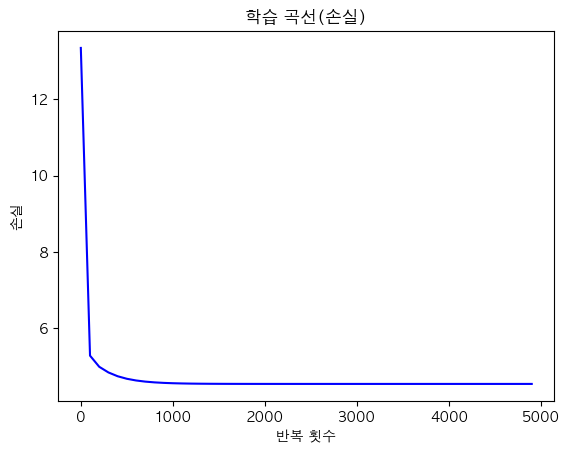

In [21]:
# 학습 곡선

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [22]:
X, Y

(tensor([-5.,  5.,  0.,  2., -2.]),
 tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000]))

In [23]:
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.tensor(X_range).float()
print(X_range)

Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-9.1034,  9.1035])


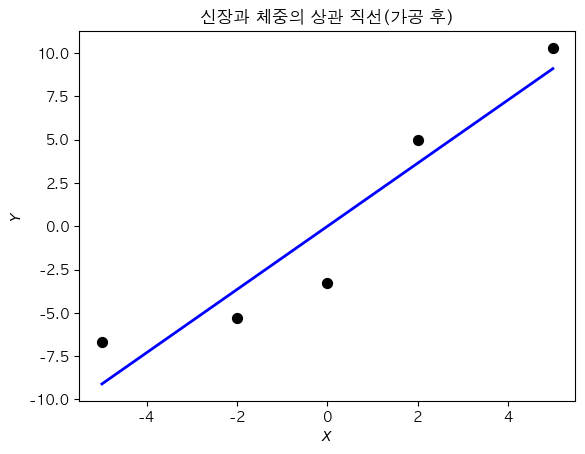

In [24]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title("신장과 체중의 상관 직선(가공 후)")
plt.show()

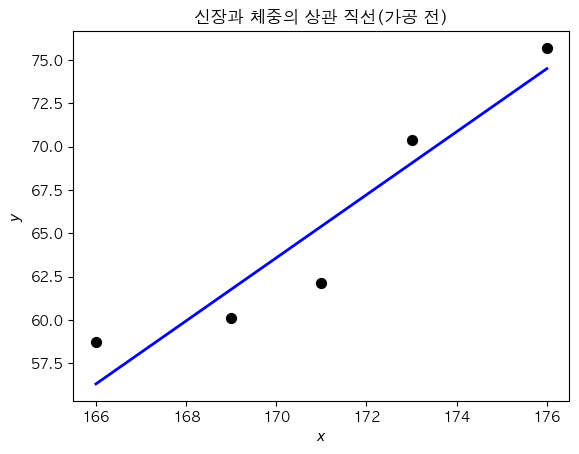

In [25]:
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

>#### 3.12 최적화 함수와 step 함수 이용하기



In [26]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W,B], lr=lr)

history = np.zeros((0,2))

for epoch in range(num_epochs):
  Yp = pred(X)
  loss = MSE(Yp, Y)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch%10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack([history, item])
    print(f'epoch = {epoch}, loss = {loss:>.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 10.3855
epoch = 20, loss = 8.5173
epoch = 30, loss = 7.3364
epoch = 40, loss = 6.5858
epoch = 50, loss = 6.1047
epoch = 60, loss = 5.7927
epoch = 70, loss = 5.5868
epoch = 80, loss = 5.4476
epoch = 90, loss = 5.3507
epoch = 100, loss = 5.2805
epoch = 110, loss = 5.2275
epoch = 120, loss = 5.1855
epoch = 130, loss = 5.1507
epoch = 140, loss = 5.1208
epoch = 150, loss = 5.0943
epoch = 160, loss = 5.0703
epoch = 170, loss = 5.0480
epoch = 180, loss = 5.0271
epoch = 190, loss = 5.0074
epoch = 200, loss = 4.9887
epoch = 210, loss = 4.9708
epoch = 220, loss = 4.9537
epoch = 230, loss = 4.9373
epoch = 240, loss = 4.9217
epoch = 250, loss = 4.9066
epoch = 260, loss = 4.8922
epoch = 270, loss = 4.8783
epoch = 280, loss = 4.8650
epoch = 290, loss = 4.8522
epoch = 300, loss = 4.8399
epoch = 310, loss = 4.8281
epoch = 320, loss = 4.8167
epoch = 330, loss = 4.8058
epoch = 340, loss = 4.7953
epoch = 350, loss = 4.7853
epoch = 360, loss = 4.7756
epoch = 37

In [27]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'최종상태 : 손실:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


>##### 최적화 함수 튜닝

In [28]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

history2 = np.zeros((0, 2))

for epoch in range(num_epochs):
  Yp = pred(X)
  loss = MSE(Yp, Y)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch%10 == 0):
    item = np.array([epoch, loss.item()])
    history2 = np.vstack([history2, item])
    print(f'epoch = {epoch}, loss = {loss:>.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 5.7585
epoch = 20, loss = 5.9541
epoch = 30, loss = 5.0276
epoch = 40, loss = 4.8578
epoch = 50, loss = 4.7052
epoch = 60, loss = 4.6327
epoch = 70, loss = 4.5940
epoch = 80, loss = 4.5698
epoch = 90, loss = 4.5574
epoch = 100, loss = 4.5495
epoch = 110, loss = 4.5452
epoch = 120, loss = 4.5426
epoch = 130, loss = 4.5411
epoch = 140, loss = 4.5403
epoch = 150, loss = 4.5398
epoch = 160, loss = 4.5395
epoch = 170, loss = 4.5393
epoch = 180, loss = 4.5392
epoch = 190, loss = 4.5391
epoch = 200, loss = 4.5391
epoch = 210, loss = 4.5391
epoch = 220, loss = 4.5391
epoch = 230, loss = 4.5390
epoch = 240, loss = 4.5390
epoch = 250, loss = 4.5390
epoch = 260, loss = 4.5390
epoch = 270, loss = 4.5390
epoch = 280, loss = 4.5390
epoch = 290, loss = 4.5390
epoch = 300, loss = 4.5390
epoch = 310, loss = 4.5390
epoch = 320, loss = 4.5390
epoch = 330, loss = 4.5390
epoch = 340, loss = 4.5390
epoch = 350, loss = 4.5390
epoch = 360, loss = 4.5390
epoch = 370

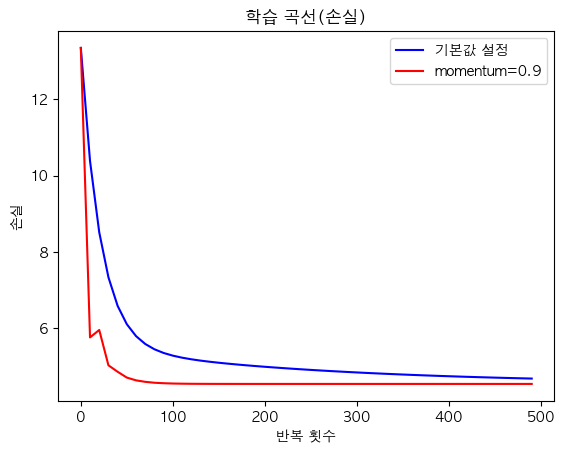

In [29]:
plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'r', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()